<a href="https://colab.research.google.com/github/maxashoka3/Machine-learning/blob/master/Mnist_Fascnn_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import tensorflow as tf

import numpy as np 
import matplotlib.pyplot as plt
print(tf.__version__)

2.4.1


In [5]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
test_images.shape


(10000, 28, 28)

In [9]:
test_labels.shape

(10000,)

In [10]:
np.unique(test_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

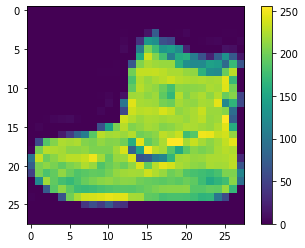

In [16]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

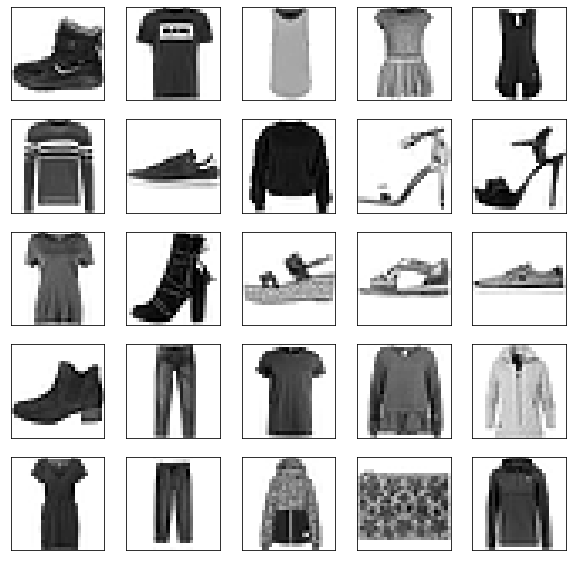

In [18]:
plt.figure(figsize = (10,10))
for i in range(25) :
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap = plt.cm.binary)
  
plt.show()


In [19]:
class_names =['T-shirt/top',
              'Trouser',
              'Pullover',
              'Dress',
              'Coat',
              'Sandal',
              'Shirt',
              'Sneaker','Bag','Ankle boot']
              

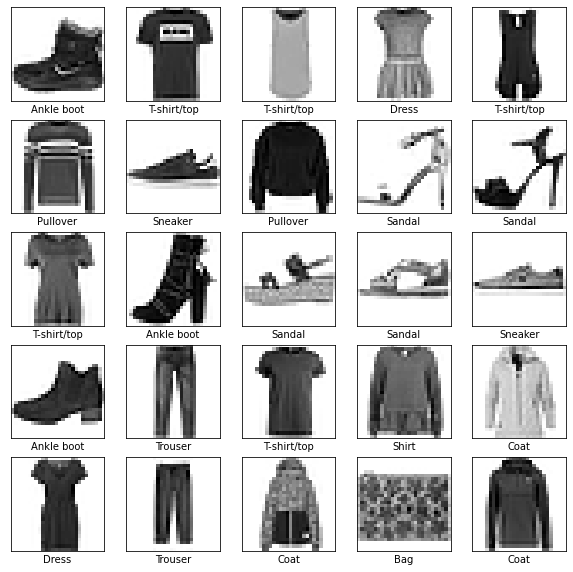

In [21]:
plt.figure(figsize = (10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(train_images[i], cmap= plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])
plt.show()

In [23]:
model = tf.keras.Sequential([
                             
                             tf.keras.layers.Flatten(input_shape = (28,28)),#reformats the data 28 *28 = 784 pixels
                             tf.keras.layers.Dense(128, activation= 'relu'),#densly connected or fully connected with 128 nodes
                             tf.keras.layers.Dense(10)# returns a logits array with length of 10 current image belongs to one of the classes
                                                        


])

In [24]:
model


In [27]:
model.compile(optimizer= 'adam',
              loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits= True),
              
              metrics=['accuracy'])

In [28]:
model.fit(train_images,train_labels, epochs= 10)

Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 11.0421 - accuracy: 0.6572
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7451 - accuracy: 0.7114
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6546 - accuracy: 0.7449
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5887 - accuracy: 0.7764
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5416 - accuracy: 0.8075
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5151 - accuracy: 0.8184
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5153 - accuracy: 0.8185
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4992 - accuracy: 0.8257
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4906 - accuracy: 0.8288
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.48

In [33]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=1)
print('\nTest accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.5961 - accuracy: 0.8147

Test accuracy: 0.8147000074386597


In [34]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])


In [35]:
predictions = probability_model.predict(test_images)

In [36]:
predictions[0]

array([2.1197811e-23, 8.6262784e-14, 0.0000000e+00, 1.4404892e-16,
       0.0000000e+00, 6.0735039e-02, 0.0000000e+00, 4.5662323e-01,
       2.0271434e-15, 4.8264176e-01], dtype=float32)

In [37]:
np.argmax(predictions[0])

9

In [38]:
test_labels[0]

9

In [39]:
test_labels[0]

9

In [46]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

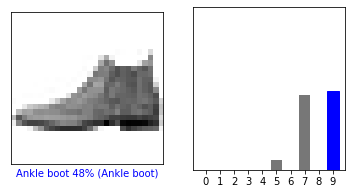

In [47]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()